In [112]:
import os
import time

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn import datasets

from scipy.stats import reciprocal

from matplotlib import pyplot as plt
%matplotlib inline

### The Perceptron

$$\mathrm{heaviside}(z) = \left\{\begin{matrix}
0\ \mathrm{if\ } z < 0
\\ 1\ \mathrm{if\ } z \geq  0
\end{matrix}\right.\ \mathrm{sgn}(z) = \left\{\begin{matrix}
-1\ \mathrm{if\ } z < 0
\\ 0\ \mathrm{if\ } z = 0
\\ +1\ \mathrm{if\ } z >  0
\end{matrix}\right.$$

$$ h_{\mathbf{W}, \mathbf{b}}(\mathbf{X}) = \phi(\mathbf{XW} + \mathbf{b}) $$

$$ w_{i, j}^{\mathrm{(next\ step)}} = w_{i, j} + \eta (y_{j} - \widehat{y}_{j})x_{i} $$

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris['data'][:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(int) # iris setosa?

In [5]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [6]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

### Installing Tensorflow 2

In [7]:
tf.__version__

'2.4.1'

In [8]:
keras.__version__

'2.4.0'

### Using Keras to load the dataset

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 7s 1us/step


In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
class_names = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", 
               "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [14]:
class_names[y_train[0]]

'Coat'

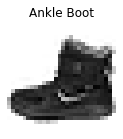

In [30]:
plt.figure(figsize=(2,2))
plt.imshow(X_valid[0], cmap=plt.cm.binary)
plt.title(class_names[y_valid[0]])
plt.axis('off')
plt.show()

### Creating the model using the sequential API

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.layers

In [38]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [39]:
model.get_layer('dense_3') is hidden1

True

In [40]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.07189856, -0.01800224, -0.04418283, ...,  0.0051268 ,
        -0.04627178, -0.06185576],
       [-0.04330121,  0.03596477,  0.02859319, ...,  0.04854272,
         0.05813622,  0.04829299],
       [ 0.03017718, -0.045347  , -0.04653372, ...,  0.05969423,
        -0.03553953,  0.02003734],
       ...,
       [-0.04981896, -0.02601535,  0.0274632 , ...,  0.01594956,
        -0.02142775, -0.00517814],
       [-0.04120284,  0.07250684,  0.04440793, ..., -0.00984857,
         0.03706438, -0.02040084],
       [-0.07058834, -0.03927016, -0.06519537, ..., -0.01874936,
        -0.06153826,  0.07016808]], dtype=float32)

In [41]:
weights.shape

(784, 300)

In [42]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [43]:
biases.shape

(300,)

### Compiling the model

In [44]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Training and evaluating the model

In [45]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9791 - accuracy: 0.6879 - val_loss: 0.5160 - val_accuracy: 0.8254
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5027 - accuracy: 0.8247 - val_loss: 0.4644 - val_accuracy: 0.8382
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4510 - accuracy: 0.8433 - val_loss: 0.4349 - val_accuracy: 0.8472
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4164 - accuracy: 0.8544 - val_loss: 0.4049 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4019 - accuracy: 0.8582 - val_loss: 0.3991 - val_accuracy: 0.8642
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3811 - accuracy: 0.8654 - val_loss: 0.3769 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3724 - accuracy: 0.8694 - val_loss: 0.3627 - val_accuracy:

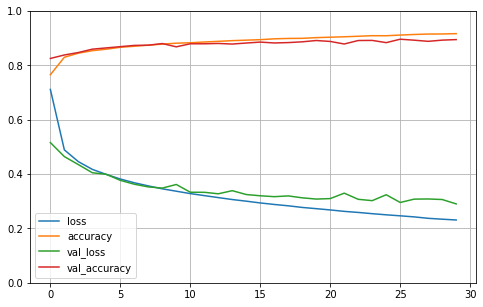

In [49]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [51]:
history2 = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2263 - accuracy: 0.9195 - val_loss: 0.2957 - val_accuracy: 0.8968
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2230 - accuracy: 0.9199 - val_loss: 0.2968 - val_accuracy: 0.8902
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2190 - accuracy: 0.9216 - val_loss: 0.3145 - val_accuracy: 0.8868
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2153 - accuracy: 0.9226 - val_loss: 0.2979 - val_accuracy: 0.8948
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2128 - accuracy: 0.9239 - val_loss: 0.3000 - val_accuracy: 0.8938
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2096 - accuracy: 0.9249 - val_loss: 0.2920 - val_accuracy: 0.8906
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2063 - accuracy: 0.9262 - val_loss: 0.3007 - val_accuracy:

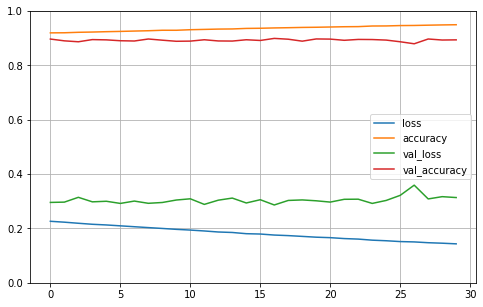

In [53]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 69.8449 - accuracy: 0.8558


[69.8448715209961, 0.8557999730110168]

### Using the model to make predictions

In [54]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [56]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [57]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trousers'], dtype='<U11')

In [58]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

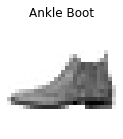

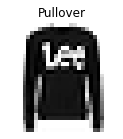

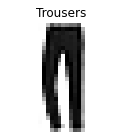

In [60]:
for i in range(3):
    plt.figure(figsize=(2, 2))
    plt.imshow(X_new[i], cmap=plt.cm.binary)
    plt.title(class_names[y_new[i]])
    plt.axis('off')
plt.show()

### Building a Regression MLP Using the Sequential API

In [62]:
housing = datasets.fetch_california_housing()

In [63]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [65]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mses_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.4506 - val_loss: 1.2912
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6594 - val_loss: 0.5041
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4756 - val_loss: 0.4765
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4598 - val_loss: 0.4632
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4230 - val_loss: 0.4560
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4380 - val_loss: 0.4511
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4129 - val_loss: 0.4423
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4247 - val_loss: 0.4384
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4131 - val_loss: 0.4336
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4034 - val_loss: 0.4270

In [68]:
mses_test

0.38088470697402954

In [69]:
y_pred

array([[0.8473681],
       [1.0753824],
       [5.7369184]], dtype=float32)

In [70]:
y_test[:3]

array([0.562  , 0.922  , 5.00001])

### Building Complex Models Using the Functional API

In [71]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [72]:
input_A = keras.layers.Input(shape=[5],name='wide_input')
input_B = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [73]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [78]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [76]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 3.5646 - val_loss: 0.9842
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9090 - val_loss: 0.7770
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7369 - val_loss: 0.7116
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6666 - val_loss: 0.6744
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6354 - val_loss: 0.6459
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6361 - val_loss: 0.6235
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5795 - val_loss: 0.6064
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5968 - val_loss: 0.5934
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5698 - val_loss: 0.5879
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5514 - val_loss: 0.5712

In [77]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.5106


In [79]:
y_pred = model.predict((X_new_A, X_new_B))

In [80]:
y_pred

array([[0.6755316 ],
       [0.47776085],
       [6.335147  ]], dtype=float32)

In [82]:
input_A = keras.layers.Input(shape=[5],name='wide_input')
input_B = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [83]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

In [85]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.2482 - main_output_loss: 1.0693 - aux_output_loss: 2.8591 - val_loss: 0.6033 - val_main_output_loss: 0.5331 - val_aux_output_loss: 1.2346
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6330 - main_output_loss: 0.5731 - aux_output_loss: 1.1720 - val_loss: 0.5553 - val_main_output_loss: 0.5019 - val_aux_output_loss: 1.0367
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5299 - main_output_loss: 0.4804 - aux_output_loss: 0.9757 - val_loss: 0.5252 - val_main_output_loss: 0.4860 - val_aux_output_loss: 0.8780
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4888 - main_output_loss: 0.4512 - aux_output_loss: 0.8274 - val_loss: 0.5041 - val_main_output_loss: 0.4729 - val_aux_output_loss: 0.7852
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - main_output_loss: 0.4397 - aux_output_loss: 0.7518 - val_loss

In [86]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.3764 - main_output_loss: 0.3614 - aux_output_loss: 0.5107


In [87]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

### Using the Subclassing API to Build Dynamic Models

In [88]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)  # handles standard args (e.g. name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

### Saving and Restoring a Model

In [89]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2949 - val_loss: 0.6282
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5394 - val_loss: 0.5006
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4593 - val_loss: 0.4632
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4337 - val_loss: 0.4847
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4185 - val_loss: 0.4342
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4045 - val_loss: 0.4270
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4103 - val_loss: 0.4241
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3865 - val_loss: 0.4244
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3810 - val_loss: 0.4116
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3815 - val_loss: 0.4147

In [90]:
model.save('my_keras_model.h5')

In [91]:
model = keras.models.load_model('my_keras_model.h5')

### Using Callbacks

In [92]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5')
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3643
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3584
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3556
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3595
Epoch 5/10
363/363 [==============================] - 0s 971us/step - loss: 0.3522
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3521
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3496
Epoch 8/10
363/363 [==============================] - 0s 982us/step - loss: 0.3480
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3487
Epoch 10/10
363/363 [==============================] - 0s 979us/step - loss: 0.3492


In [93]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model('my_keras_model.h5')

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3472 - val_loss: 0.3729
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3485 - val_loss: 0.3676
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3440 - val_loss: 0.3673
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3423 - val_loss: 0.3817
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3414 - val_loss: 0.3674
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3426 - val_loss: 0.3643
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3404 - val_loss: 0.3653
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3387 - val_loss: 0.3673
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3371 - val_loss: 0.3637
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3359 - val_loss: 0.3610

In [94]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3405 - val_loss: 0.3595
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3439 - val_loss: 0.3703
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3374 - val_loss: 0.3627
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3319 - val_loss: 0.3573
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3289 - val_loss: 0.3817
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3281 - val_loss: 0.3545
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3283 - val_loss: 0.3539
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3258 - val_loss: 0.3636
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3267 - val_loss: 0.3621
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3281 - val_lo

In [95]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

In [96]:
print_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=100, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb, early_stopping_cb, print_ratio_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3145 - val_loss: 0.3477

val/train: 1.11
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3144 - val_loss: 0.3486

val/train: 1.11
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3170 - val_loss: 0.3465

val/train: 1.09
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3152 - val_loss: 0.3494

val/train: 1.11
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3117 - val_loss: 0.3493

val/train: 1.12
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3132 - val_loss: 0.3450

val/train: 1.10
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3119 - val_loss: 0.3415

val/train: 1.09
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3117 - val_loss: 0.3426

val/train: 1.10
Epoch 9/100
363/363 [==============================] - 1

### Using TensorBoard for Visualization

In [98]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [101]:
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [104]:
run_logdir = get_run_logdir()

In [105]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=32,
                   validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/32
363/363 [==============================] - 1s 2ms/step - loss: 0.3279 - val_loss: 0.3409
Epoch 2/32
363/363 [==============================] - 1s 1ms/step - loss: 0.3089 - val_loss: 0.3558
Epoch 3/32
363/363 [==============================] - 1s 1ms/step - loss: 0.3238 - val_loss: 0.3426
Epoch 4/32
363/363 [==============================] - 1s 2ms/step - loss: 0.3168 - val_loss: 0.3425
Epoch 5/32
363/363 [==============================] - 0s 1ms/step - loss: 0.3100 - val_loss: 0.3336
Epoch 6/32
363/363 [==============================] - 0s 1ms/step - loss: 0.3024 - val_loss: 0.3325
Epoch 7/32
363/363 [==============================] - 0s 1ms/step - loss: 0.3020 - val_loss: 0.3455
Epoch 8/32
363/363 [==============================] - 0s 1ms/step - loss: 0.3023 - val_loss: 0.3347
Epoch 9/32
363/363 [==============================] - 0s 1ms/step - loss: 0.3017 - val_loss: 0.3324
Epoch 10/32
363/363 [==============================] - 0s 1ms/step - loss: 0.3024 - val_loss: 0.3355

In [106]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar('my_scalar', np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram('my_hist', data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32x32 RGB images
        tf.summary.image('my_images', images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text('my_text', texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio('my_audio', audio, sample_rate=48000, step=step)        

### Fine-Tuning Neural Network Hyperparameters

In [109]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [110]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [111]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 2.2104 - val_loss: 0.8178
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7575 - val_loss: 0.7125
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6509 - val_loss: 0.6422
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5960 - val_loss: 0.5955
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5438 - val_loss: 0.5624
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5256 - val_loss: 0.5388
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5021 - val_loss: 0.5190
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4814 - val_loss: 0.5083
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4662 - val_loss: 0.4971
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4789 - val_lo

In [113]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

In [115]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 2.1429 - val_loss: 0.6599
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.8748 - val_loss: 0.5791
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5618 - val_loss: 0.5509
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5590 - val_loss: 0.5967
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5318 - val_loss: 1.0392
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6265 - val_loss: 0.5405
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5895 - val_loss: 0.5429
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5503 - val_loss: 0.5474
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5277 - val_loss: 1.1470
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6948 - val_lo

Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5761 - val_loss: 0.6010
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5409 - val_loss: 0.5807
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5187 - val_loss: 0.5646
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5152 - val_loss: 0.5516
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5447 - val_loss: 0.5409
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4756 - val_loss: 0.5311
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4709 - val_loss: 0.5240
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4787 - val_loss: 0.5185
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4907 - val_loss: 0.5121
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4846 - va

Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4117 - val_loss: 0.4580
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4088 - val_loss: 0.4573
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4159 - val_loss: 0.4567
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4190 - val_loss: 0.4561
Epoch 69/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4185 - val_loss: 0.4556
Epoch 70/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4119 - val_loss: 0.4552
Epoch 71/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4309 - val_loss: 0.4541
Epoch 72/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4022 - val_loss: 0.4541
Epoch 73/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4237 - val_loss: 0.4535
Epoch 74/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4108

242/242 [==============================] - 0s 2ms/step - loss: 0.4388 - val_loss: 0.4780
Epoch 72/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4491 - val_loss: 0.4774
Epoch 73/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4474 - val_loss: 0.4767
Epoch 74/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4683 - val_loss: 0.4761
Epoch 75/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4220 - val_loss: 0.4753
Epoch 76/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4615 - val_loss: 0.4746
Epoch 77/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4706 - val_loss: 0.4743
Epoch 78/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4450 - val_loss: 0.4733
Epoch 79/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4614 - val_loss: 0.4727
Epoch 80/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4488 - val_loss: 

Epoch 51/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4704 - val_loss: 0.4929
Epoch 52/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4662 - val_loss: 0.4918
Epoch 53/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4529 - val_loss: 0.4909
Epoch 54/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4585 - val_loss: 0.4901
Epoch 55/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4468 - val_loss: 0.4887
Epoch 56/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4455 - val_loss: 0.4876
Epoch 57/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4468 - val_loss: 0.4869
Epoch 58/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4803 - val_loss: 0.4862
Epoch 59/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4604 - val_loss: 0.4855
Epoch 60/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4531

Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5645 - val_loss: 0.5877
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5738 - val_loss: 0.5776
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5587 - val_loss: 0.5688
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5477 - val_loss: 0.5604
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5078 - val_loss: 0.5533
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5101 - val_loss: 0.5479
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5325 - val_loss: 0.5432
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5205 - val_loss: 0.5383
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5068 - val_loss: 0.5338
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5034

Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4341 - val_loss: 0.4668
Epoch 71/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4358 - val_loss: 0.4669
Epoch 72/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4195 - val_loss: 0.4658
Epoch 73/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4380 - val_loss: 0.4653
Epoch 74/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4389 - val_loss: 0.4647
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4449 - val_loss: 0.4649
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4384 - val_loss: 0.4639
Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4271 - val_loss: 0.4635
Epoch 78/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4181 - val_loss: 0.4622
Epoch 79/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4242

Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4026 - val_loss: 0.4165
Epoch 30/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3967 - val_loss: 0.4048
Epoch 31/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3947 - val_loss: 0.4040
Epoch 32/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3816 - val_loss: 0.4030
Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3825 - val_loss: 0.3968
Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3934 - val_loss: 0.3956
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3751 - val_loss: 0.4048
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3676 - val_loss: 0.3911
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3664 - val_loss: 0.3962
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3745

242/242 [==============================] - 0s 2ms/step - loss: 0.2948 - val_loss: 0.3344
Epoch 89/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2778 - val_loss: 0.3276
Epoch 90/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2834 - val_loss: 0.3267
Epoch 91/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2773 - val_loss: 0.3298
Epoch 92/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2738 - val_loss: 0.3259
Epoch 93/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2858 - val_loss: 0.3253
Epoch 94/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2756 - val_loss: 0.3357
Epoch 95/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2729 - val_loss: 0.3326
Epoch 96/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2794 - val_loss: 0.3321
Epoch 97/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2559 - val_loss: 

Epoch 68/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3128 - val_loss: 0.3599
Epoch 69/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3109 - val_loss: 0.3459
Epoch 70/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3037 - val_loss: 0.3481
Epoch 71/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2882 - val_loss: 0.3443
Epoch 72/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3015 - val_loss: 0.3481
Epoch 73/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2843 - val_loss: 0.3488
Epoch 74/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3034 - val_loss: 0.3421
Epoch 75/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2917 - val_loss: 0.3460
Epoch 76/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3019 - val_loss: 0.3460
Epoch 77/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2814

242/242 [==============================] - 0s 2ms/step - loss: 0.4328 - val_loss: 0.4566
Epoch 80/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4447 - val_loss: 0.4562
Epoch 81/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4440 - val_loss: 0.4556
Epoch 82/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4071 - val_loss: 0.4545
Epoch 83/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4576 - val_loss: 0.4542
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4356 - val_loss: 0.4535
Epoch 85/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4370 - val_loss: 0.4529
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4386 - val_loss: 0.4529
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4418 - val_loss: 0.4520
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4164 - val_loss: 

Epoch 59/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4262 - val_loss: 0.4692
Epoch 60/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4489 - val_loss: 0.4684
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4312 - val_loss: 0.4676
Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4348 - val_loss: 0.4668
Epoch 63/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4386 - val_loss: 0.4661
Epoch 64/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4343 - val_loss: 0.4652
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4387 - val_loss: 0.4645
Epoch 66/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4291 - val_loss: 0.4634
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4302 - val_loss: 0.4632
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4136

Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5378 - val_loss: 0.5490
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5412 - val_loss: 0.5524
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5337 - val_loss: 0.5495
Epoch 21/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5503 - val_loss: 0.5476
Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5208 - val_loss: 0.5485
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5198 - val_loss: 0.5470
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5343 - val_loss: 0.5477
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5360 - val_loss: 0.5468
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5277 - val_loss: 0.5463
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5280

242/242 [==============================] - 0s 2ms/step - loss: 0.5960 - val_loss: 0.6096
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5778 - val_loss: 0.6007
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6007 - val_loss: 0.5932
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5591 - val_loss: 0.5864
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5356 - val_loss: 0.5808
Epoch 14/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5585 - val_loss: 0.5762
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5498 - val_loss: 0.5715
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5228 - val_loss: 0.5677
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5441 - val_loss: 0.5643
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5410 - val_loss: 

Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4489 - val_loss: 0.4659
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4472 - val_loss: 0.4643
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4549 - val_loss: 0.4627
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4423 - val_loss: 0.4606
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4389 - val_loss: 0.4580
Epoch 21/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4526 - val_loss: 0.4576
Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4380 - val_loss: 0.4551
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4239 - val_loss: 0.4514
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4106 - val_loss: 0.4504
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4413

Epoch 76/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3666 - val_loss: 0.3893
Epoch 77/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3725 - val_loss: 0.3868
Epoch 78/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3546 - val_loss: 0.3860
Epoch 79/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3636 - val_loss: 0.3866
Epoch 80/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3791 - val_loss: 0.3852
Epoch 81/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3574 - val_loss: 0.3850
Epoch 82/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3638 - val_loss: 0.3824
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3594 - val_loss: 0.3819
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3672 - val_loss: 0.3964
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3636

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x15a39cf10>, as the constructor either does not set or modifies parameter learning_rate

In [116]:
rnd_search_cv.best_params_

{'learning_rate': 0.0035921799962015176, 'n_hidden': 3, 'n_neurons': 36}

In [117]:
rnd_search_cv.best_score_

-0.31351269284884137

In [124]:
model = rnd_search_cv.estimator.model

### Exercises

#### 10.

In [125]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 19s 2us/step


In [126]:
X_train_full.shape

(60000, 28, 28)

In [127]:
X_train_full.dtype

dtype('uint8')

In [128]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

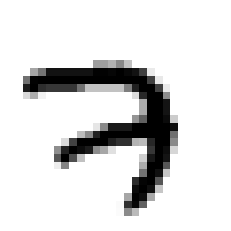

In [129]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [130]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [131]:
X_valid.shape

(5000, 28, 28)

In [133]:
X_test.shape

(10000, 28, 28)

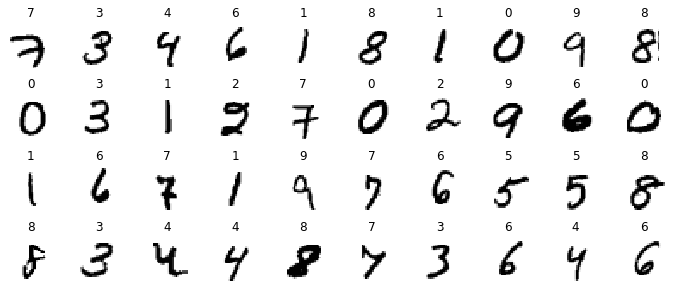

In [134]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [135]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
        
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [136]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [137]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [138]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [139]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 10s 5ms/step - loss: nan - accuracy: 0.4944 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

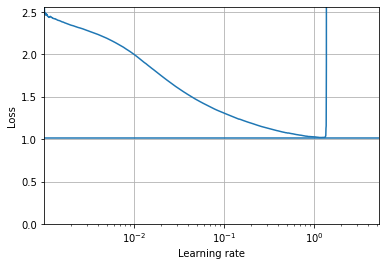

In [140]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [141]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [142]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [143]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=3e-1),
              metrics=["accuracy"])

In [144]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [145]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4200 - accuracy: 0.8678 - val_loss: 0.0978 - val_accuracy: 0.9704
Epoch 2/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0943 - accuracy: 0.9696 - val_loss: 0.0885 - val_accuracy: 0.9744
Epoch 3/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0656 - accuracy: 0.9782 - val_loss: 0.0836 - val_accuracy: 0.9764
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0441 - accuracy: 0.9852 - val_loss: 0.0721 - val_accuracy: 0.9806
Epoch 5/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0773 - val_accuracy: 0.9812
Epoch 6/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0292 - accuracy: 0.9901 - val_loss: 0.0768 - val_accuracy: 0.9816
Epoch 7/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0965 - val_

In [146]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0781 - accuracy: 0.9775


[0.07812134176492691, 0.9775000214576721]